In [1]:
import warnings; warnings.filterwarnings('ignore')

import os
import sys

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 3)
mpl.rcParams['axes.grid'] = False

from pathlib import Path
base = Path('.')

In [52]:
path = base / 'exp1' / 'baseline4.csv'
df = pd.read_csv(path)
df.head()

,step,action,upstream_demand,downstream_demand,upstream_l,upstream_inflow,upstream_n_onramp1,upstream_n_onramp2,upstream_n_queued,upstream_k,upstream_v,upstream_q,downstream_l,downstream_inflow,downstream_n_onramp1,downstream_n_onramp2,downstream_n_queued,downstream_k,downstream_v,downstream_q,reward,total_reward,episode
0,1,0,8440.155119,6559.844881,4,9,1,1,0,3.500000,98.214055,1620.0,4,7,0,1,0,3.500000,87.023257,1440.0,-0.073813,-0.073813,0
1,2,1,9365.478492,5634.521508,5,8,0,1,0,6.400000,91.558550,2520.0,3,2,0,0,0,6.666667,88.695943,1440.0,-0.095425,-0.169238,0
2,3,1,10261.372360,4738.627640,6,16,2,2,0,9.333333,90.965498,5400.0,2,5,2,1,0,12.000000,89.576422,2160.0,-0.094512,-0.263750,0
3,4,1,11113.703235,3886.296765,7,10,0,0,0,11.428571,91.187680,6120.0,1,5,1,0,0,28.000000,82.459224,2520.0,-0.110753,-0.374503,0
4,5,2,11909.024874,3090.975126,6,14,1,1,0,16.000000,91.561022,8640.0,2,3,0,1,0,16.000000,85.691912,2340.0,-0.099063,-0.473565,0


In [53]:
WARMUP = 1

a = 0.2

def plot_lanes():
    for ep in df.episode.unique():
        df_ep = df.loc[df.episode == ep]
        
        x = df_ep.step.values[WARMUP:]
        y = df_ep.iloc[WARMUP:][f'upstream_l']
        _ = plt.plot(x, y, label='upstream', c='blue', alpha=a, drawstyle='steps')
        
    df_mean = df.groupby('step', as_index=False).mean()
    x = df_mean.step.values[WARMUP:]
    y = df_mean.iloc[WARMUP:][f'upstream_l']
    _ = plt.plot(y, label='upstream', c='blue', drawstyle='steps')
    
    _ = plt.xlabel('steps')
    _ = plt.ylabel('upstream lanes')    
    plt.show()

def make_plot(metric, ylabel=None):
    
    drawstyle = 'steps' if metric == 'n_queued' else None 
    
    for ep in df.episode.unique():
        df_ep = df.loc[df.episode == ep]
        
        x = df_ep.step.values[WARMUP:]
        y1 = df_ep.iloc[WARMUP:][f'upstream_{metric}']
        y2 = df_ep.iloc[WARMUP:][f'downstream_{metric}']
        
        _ = plt.plot(x, y1, label='upstream', c='blue', alpha=a, drawstyle=drawstyle)
        _ = plt.plot(x, y2, label='downstream', c='green', alpha=a, drawstyle=drawstyle)
        
    df_mean = df.groupby('step', as_index=False).mean()
    
    x = df_mean.step.values[WARMUP:]
    y1 = df_mean.iloc[WARMUP:][f'upstream_{metric}']
    y2 = df_mean.iloc[WARMUP:][f'downstream_{metric}']
    
    _ = plt.plot(x, y1, label='upstream', c='blue', drawstyle=drawstyle)
    _ = plt.plot(x, y2, label='downstream', c='green', drawstyle=drawstyle)
    
    
    _ = plt.xlabel('steps')
    ylab = ylabel or metric
    _ = plt.ylabel(ylab)
    #_ = plt.legend()
    
    plt.show()
    
def plot2(metric, ylabel=None):
    for ep in df.episode.unique():
        df_ep = df.loc[df.episode == ep]
        x = df_ep.step.values[WARMUP:]
        y = df_ep[f'{metric}'][WARMUP:]
        _ = plt.plot(x, y, c='black', alpha=a)
        
    df_mean = df.groupby('step', as_index=False).mean()
    
    x = df_mean.step.values[WARMUP:]
    y = df_mean[f'{metric}'][WARMUP:]
    _ = plt.plot(x, y, c='black')
        
    _ = plt.xlabel('steps')
    ylab = ylabel or metric
    _ = plt.ylabel(ylab)
    plt.show()

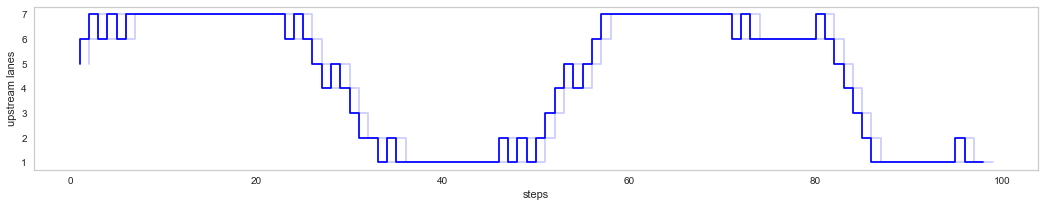

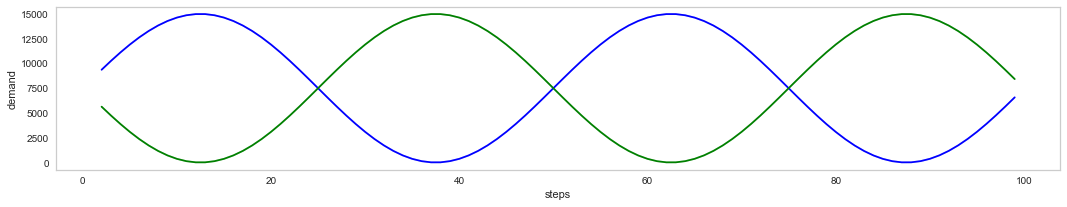

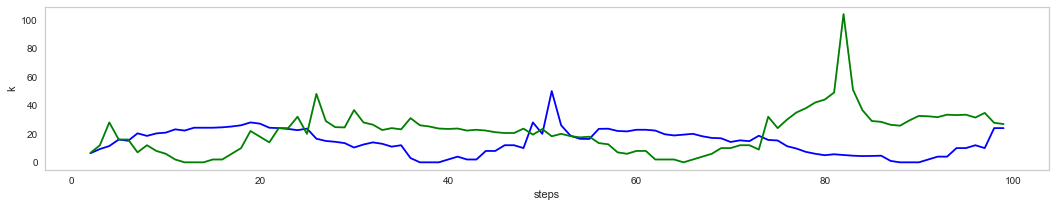

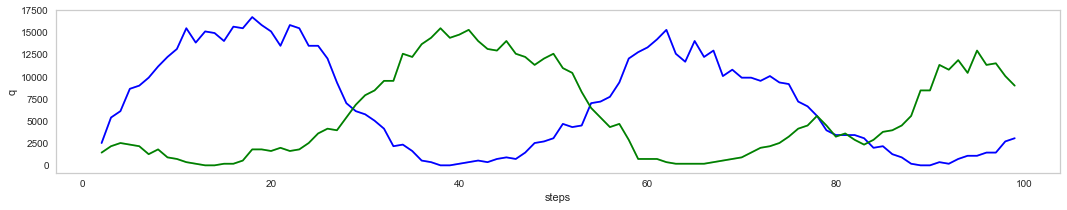

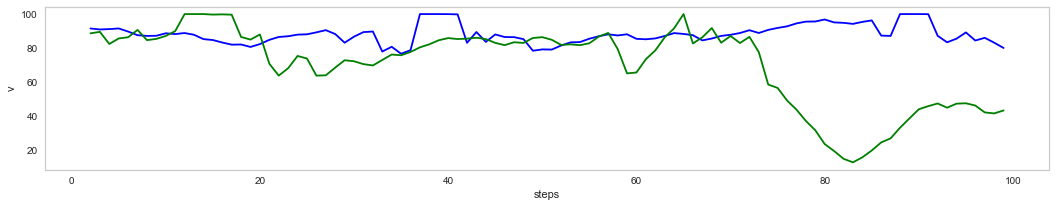

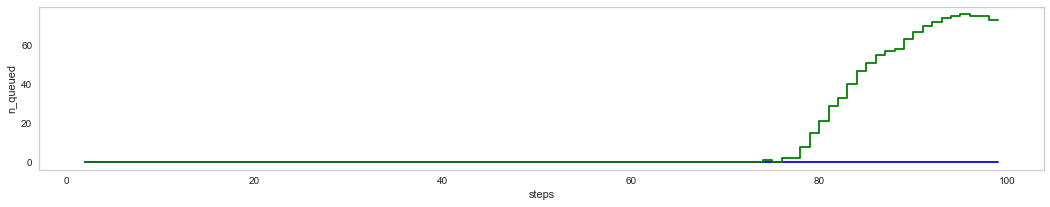

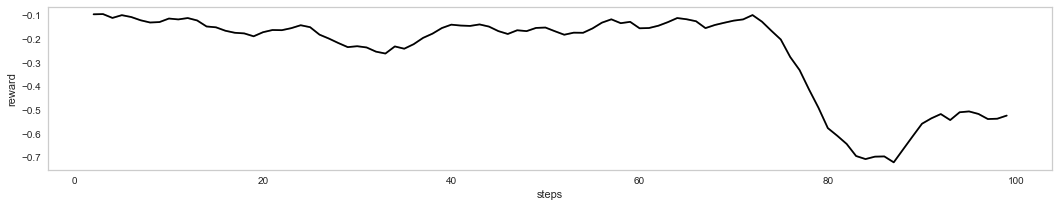

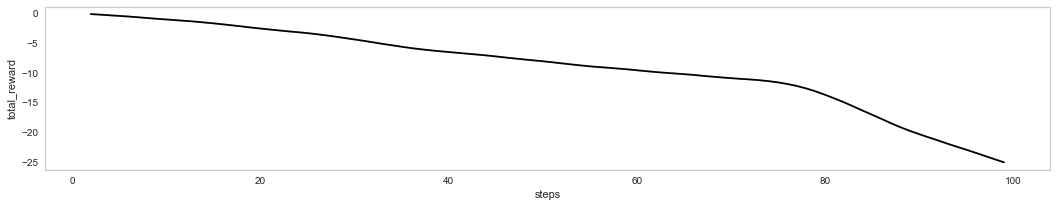

In [54]:
metrics = ['demand', 'k', 'q', 'v', 'n_queued']

plot_lanes()
for m in metrics:
    make_plot(m)
    
plot2('reward')
plot2('total_reward')